In [ ]:
DATA 620 Final Project

-Bikram Barua & Leticia Salazar

In [28]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from textblob import TextBlob
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk import ngrams
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models


In [33]:
nltk.download('wordnet')
nltk.download('punkt')

nltk.download('stopwords')
nltk.download('omw-1.4')



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bbarua\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bbarua\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bbarua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bbarua\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/baruab/baruab/main/tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


### Pre-processing

In [31]:
#function for removing the punctuations
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [32]:
df['Review']= df['Review'].apply(lambda x:remove_punctuation(x))
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4 experience hotel monaco seatt...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5


In [9]:
## Make all lowercase
df['Review']= df['Review'].apply(lambda x: x.lower())
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4 experience hotel monaco seatt...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5


In [34]:
# Check counts of all rating
df['Rating'].value_counts(normalize=True)

5    0.441853
4    0.294715
3    0.106583
2    0.087502
1    0.069348
Name: Rating, dtype: float64

### Rating and Review Visualization

Text(0.5, 1.0, 'Count of reviews by rating')

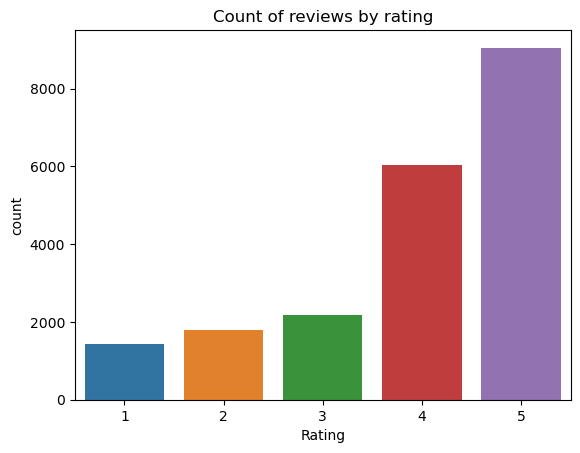

In [35]:
# Visualize rating distribution
sns.countplot(data=df, x='Rating')
plt.title('Count of reviews by rating')

In [36]:
# Count length of the reviews
df['Length'] = df['Review'].apply(len)
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,4,581
1,ok nothing special charge diamond member hilto...,2,1663
2,nice rooms not 4 experience hotel monaco seatt...,3,1395
3,unique great stay wonderful time hotel monaco ...,5,584
4,great stay great stay went seahawk game awesom...,5,1241


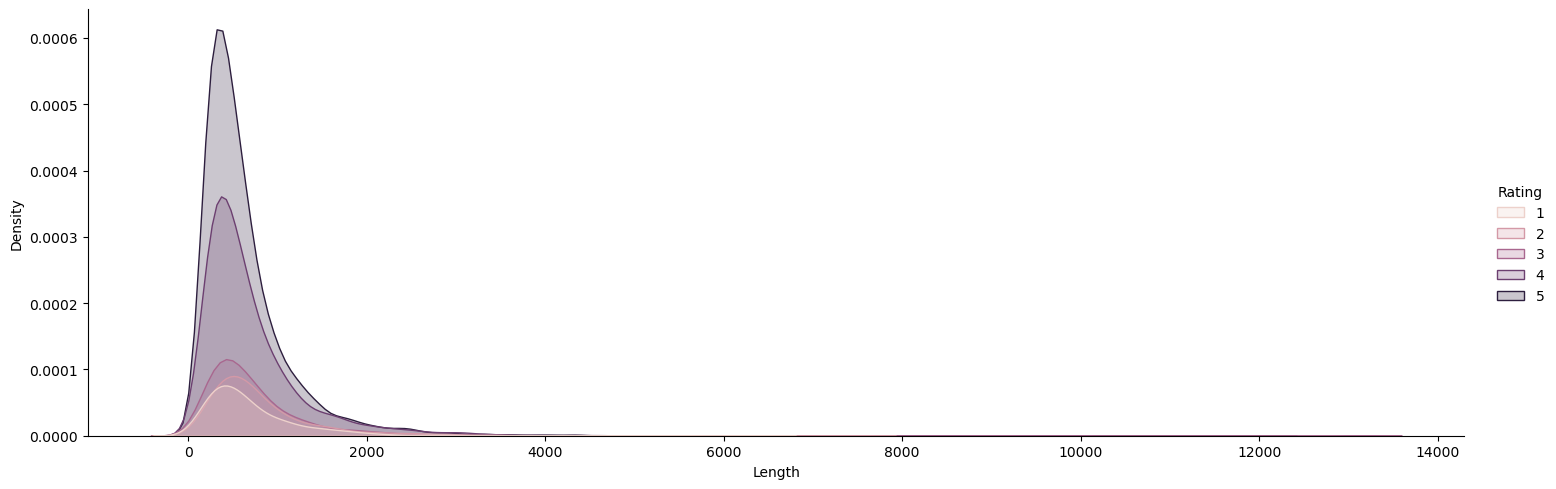

In [37]:
# Visualize length distribution based on the rating
sns.displot(data=df, x='Length', hue='Rating', kind='kde', fill=True, aspect=3)

### Tokenization

In [10]:
df['Review']=df['Review'].astype(str)

def tokenize_review(review):
    tokens = word_tokenize(review)
    return tokens

df['tokens'] = df['Review'].apply(tokenize_review)
df.head()


,Review,Rating,tokens
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4 experience hotel monaco seatt...,3,"[nice, rooms, not, 4, experience, hotel, monac..."
3,unique great stay wonderful time hotel monaco ...,5,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,5,"[great, stay, great, stay, went, seahawk, game..."


### Remove stopwords

In [11]:
stopwords = nltk.corpus.stopwords.words('english')

#function for removing stopwords
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output


df['tokens']= df['tokens'].apply(lambda x:remove_stopwords(x))
df.head()

,Review,Rating,tokens
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4 experience hotel monaco seatt...,3,"[nice, rooms, 4, experience, hotel, monaco, se..."
3,unique great stay wonderful time hotel monaco ...,5,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,5,"[great, stay, great, stay, went, seahawk, game..."


### Stemming

For example, words like ‘programmer’, ‘programming, ‘program’ will be stemmed to ‘program’.

In [12]:
porter_stemmer = PorterStemmer()
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text


df['stem']=df['tokens'].apply(lambda x: stemming(x))
df.head()

,Review,Rating,tokens,stem
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member...","[ok, noth, special, charg, diamond, member, hi..."
2,nice rooms not 4 experience hotel monaco seatt...,3,"[nice, rooms, 4, experience, hotel, monaco, se...","[nice, room, 4, experi, hotel, monaco, seattl,..."
3,unique great stay wonderful time hotel monaco ...,5,"[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona..."
4,great stay great stay went seahawk game awesom...,5,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."


### Lemmatization

It stems the word but makes sure that it does not lose its meaning. Lemmatization has a pre-defined dictionary that stores the context of words and checks the word in the dictionary while diminishing.

In [16]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bbarua\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

df['lemmatize']=df['stem'].apply(lambda x:lemmatizer(x))
df.head()


,Review,Rating,tokens,stem,lemmatize
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s...","[nice, hotel, expens, park, got, good, deal, s..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member...","[ok, noth, special, charg, diamond, member, hi...","[ok, noth, special, charg, diamond, member, hi..."
2,nice rooms not 4 experience hotel monaco seatt...,3,"[nice, rooms, 4, experience, hotel, monaco, se...","[nice, room, 4, experi, hotel, monaco, seattl,...","[nice, room, 4, experi, hotel, monaco, seattl,..."
3,unique great stay wonderful time hotel monaco ...,5,"[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona...","[uniqu, great, stay, wonder, time, hotel, mona..."
4,great stay great stay went seahawk game awesom...,5,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."


### Statistical Analysis

Word frequency count

In [18]:
freq = {}
for i in df['lemmatize']:
    for j in i:
        if j not in freq:
            freq[j] = 1
        else:
            freq[j] += 1
            
list(freq.items())[:25]            

[('nice', 13053),
 ('hotel', 52869),
 ('expens', 2015),
 ('park', 3195),
 ('got', 6185),
 ('good', 17109),
 ('deal', 1664),
 ('stay', 28240),
 ('anniversari', 413),
 ('arriv', 4854),
 ('late', 1584),
 ('even', 2100),
 ('took', 2942),
 ('advic', 513),
 ('previou', 737),
 ('review', 5296),
 ('valet', 514),
 ('check', 4966),
 ('quick', 897),
 ('easi', 2137),
 ('littl', 6243),
 ('disappoint', 2000),
 ('nonexist', 79),
 ('view', 5922),
 ('room', 46320)]

In [20]:
freq_df=pd.DataFrame(sorted(freq.items(),key=lambda x:x[1],reverse=True))

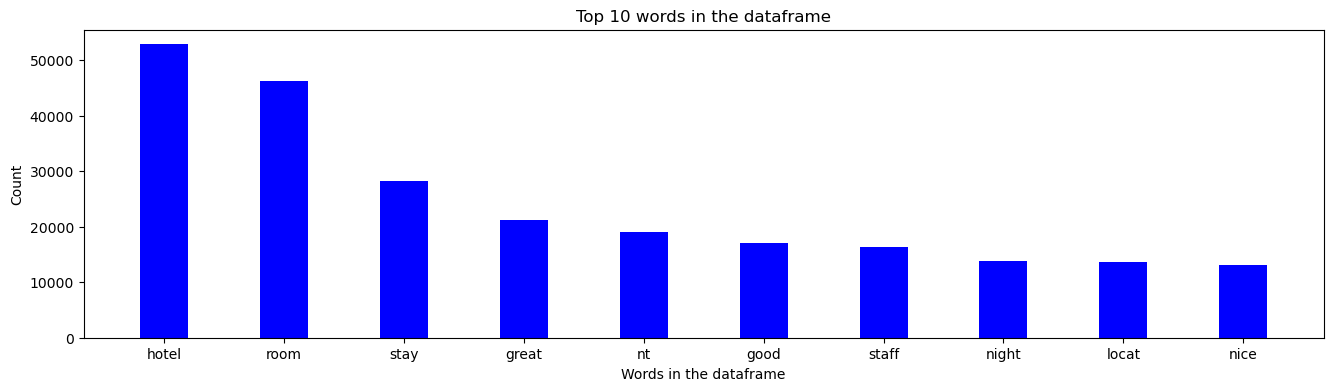

In [22]:
f1=freq_df[0][:10]
f2=freq_df[1][:10]

plt.figure(1,figsize=(16,4))
plt.bar(f1,f2,color ='blue',width = 0.4)
plt.xlabel("Words in the dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in the dataframe")
plt.savefig("wordfrequency.png")
plt.show()

### Sentiment Analysis
We can perform sentiment analysis to analyze sentiment of each review and classify it as positive, negative, or neutral. The results will be compared with the real rating of the hotel.

In [45]:
#this function give a value from -1 to 1 based on whether the data is negative or neutral or positive.
def get_sentiment(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity


df['sentiment'] = df['Review'].apply(get_sentiment)
df.head()


# Print the number of positive, negative, and neutral reviews
print("Number of positive reviews:", len(df[df['sentiment'] > 0.2]))
print("Number of negative reviews:", len(df[df['sentiment'] < -0.1]))
#print("Number of neutral reviews:", len(df[(df['sentiment'] > -0.1) AND (df['sentiment'] < 0.2)]) )

Number of positive reviews: 14453
Number of negative reviews: 627


### Visualization

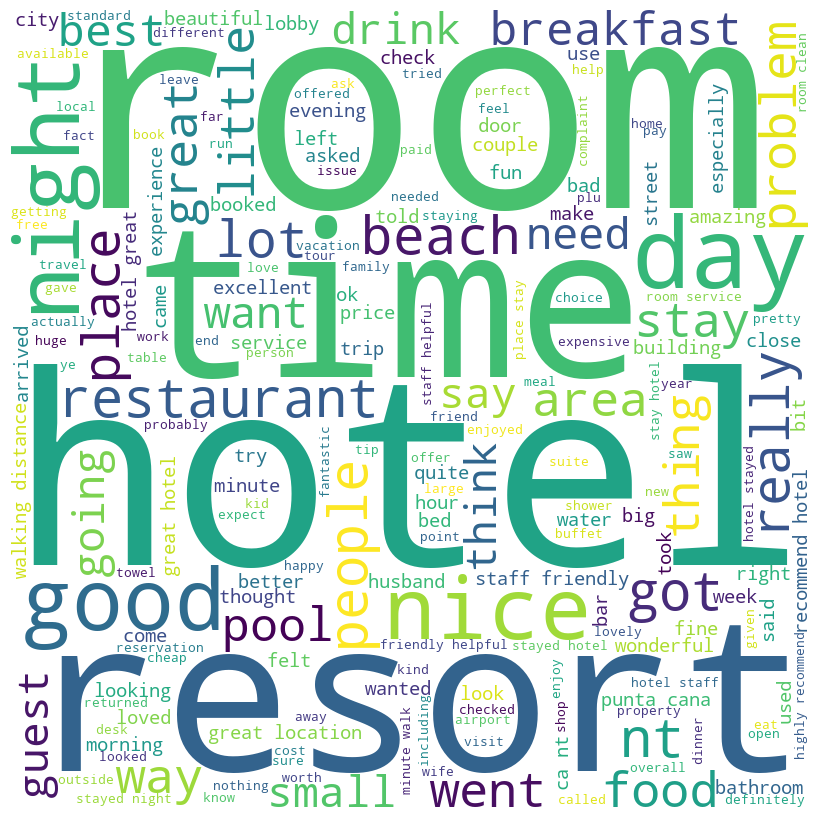

In [24]:
# WordCloud

text = ' '.join(df['Review'])
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("wordcloud.png")
plt.show()

 'hotel', 'resort' and 'room' are the most frequently used words in the reviews.

### Scatterplot of sentiment vs rating

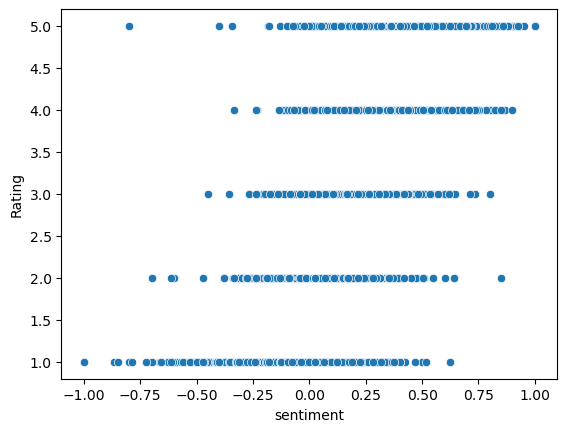

In [25]:
sns.scatterplot(data=df, x='sentiment', y='Rating')
plt.savefig("scatterplot.png")
plt.show()

### Heatmap of correlation between Sentiment and Rating

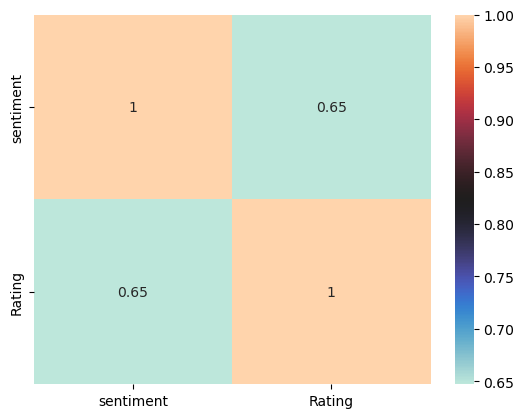

In [26]:
sns.heatmap(df[['sentiment', 'Rating']].corr(), annot=True, cmap='icefire')
plt.savefig("correlationheatmap.png")
plt.show()

### Advanced NLP techniques

#### Topic modeling with Latent Dirichlet Allocation (LDA)

In [27]:
texts = df['lemmatize'].tolist()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


lda_model = models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=10,passes=10)

for i, topic in lda_model.show_topics(num_topics=10, num_words=10, formatted=False):
    print(f"Topic {i+1}: {' '.join([word[0] for word in topic])}")

Topic 1: barcelona la rambla catalunya gracia placa casa fluent tapa cava
Topic 2: mate restraunt academi au mongkok surli basin consult mouse drab
Topic 3: princ infest rudest globu ii pester burst reschedul 96 82
Topic 4: hotel room stay locat good great walk breakfast nice clean
Topic 5: sunbath dissappoint sant jade rob reader soil wick upsid disadvantag
Topic 6: room hotel nt stay night day check ask time desk
Topic 7: beach resort food good great nt pool day time peopl
Topic 8: pool area room nice view servic restaur hotel free park
Topic 9: hotel stay staff great room love servic help recommend wonder
Topic 10: sydney conrad marco spain minimalist 2000 diagon polo clinic xma
